<a href="https://colab.research.google.com/github/trinhminhtris/Expert-system-Fuzzy-logic/blob/main/AI_week_6___11_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=e036094ad0a9beb28007f52a9c11a7caac967e423e7b0576dcc90f2d7a1bdac7
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


174.99999999999997
37.499999999999986


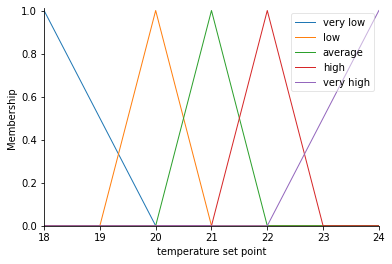

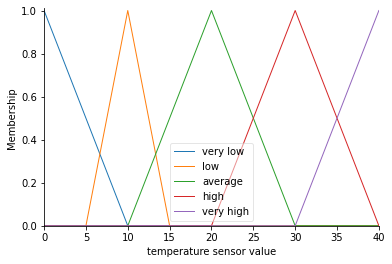

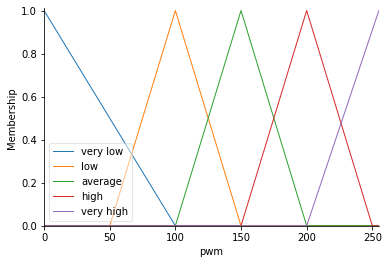

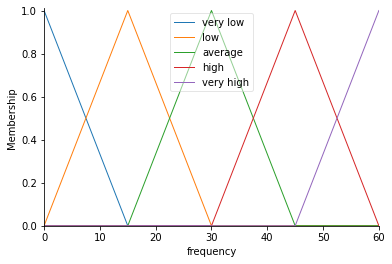

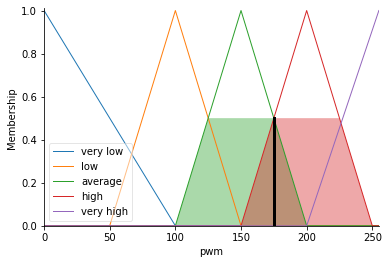

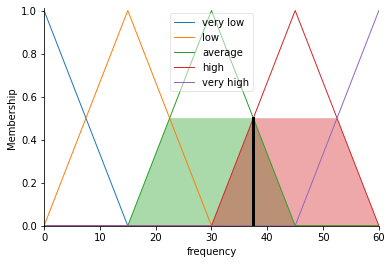

In [ ]:
# Điều khiển động cơ DC / AC
# Nhiệt độ
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temp_setpoint = ctrl.Antecedent(np.arange(18, 25, 1), 'temperature set point')
temp_val_sensor = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature sensor value')
pwm = ctrl.Consequent(np.arange(0, 256, 1), 'pwm')
freq = ctrl.Consequent(np.arange(0, 61, 1), 'frequency')

temp_setpoint['very low'] = fuzz.trimf(temp_setpoint.universe, [18, 18, 20])
temp_setpoint['low'] = fuzz.trimf(temp_setpoint.universe, [19, 20, 21])
temp_setpoint['average'] = fuzz.trimf(temp_setpoint.universe, [20, 21, 22])
temp_setpoint['high'] = fuzz.trimf(temp_setpoint.universe, [21, 22, 23])
temp_setpoint['very high'] = fuzz.trimf(temp_setpoint.universe, [22, 24, 24])

temp_val_sensor['very low'] = fuzz.trimf(temp_val_sensor.universe, [0, 0, 10])
temp_val_sensor['low'] = fuzz.trimf(temp_val_sensor.universe, [5, 10, 15])
temp_val_sensor['average'] = fuzz.trimf(temp_val_sensor.universe, [10, 20, 30])
temp_val_sensor['high'] = fuzz.trimf(temp_val_sensor.universe, [20, 30, 40])
temp_val_sensor['very high'] = fuzz.trimf(temp_val_sensor.universe, [30, 40, 40])

pwm['very low'] = fuzz.trimf(pwm.universe, [0, 0, 100])
pwm['low'] = fuzz.trimf(pwm.universe, [50, 100, 150])
pwm['average'] = fuzz.trimf(pwm.universe, [100, 150, 200])
pwm['high'] = fuzz.trimf(pwm.universe, [150, 200, 250])
pwm['very high'] = fuzz.trimf(pwm.universe, [200, 255, 255])

freq['very low'] = fuzz.trimf(freq.universe, [0, 0, 15])
freq['low'] = fuzz.trimf(freq.universe, [0, 15, 30])
freq['average'] = fuzz.trimf(freq.universe, [15, 30, 45])
freq['high'] = fuzz.trimf(freq.universe, [30, 45, 60])
freq['very high'] = fuzz.trimf(freq.universe, [45, 60, 60])

temp_setpoint.view()
temp_val_sensor.view()
pwm.view()
freq.view()

rule1 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['very low'], pwm['very low'])
rule2 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['low'], pwm['low'])
rule3 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['average'], pwm['average'])
rule4 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['high'], pwm['high'])
rule5 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['very high'], pwm['very high'])
rule6 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['very low'], pwm['very low'])
rule7 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['low'], pwm['very low'])
rule8 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['average'], pwm['low'])
rule9 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['high'], pwm['average'])
rule10 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['very high'], pwm['high'])
rule11 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['very low'], pwm['very low'])
rule12 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['low'], pwm['very low'])
rule13 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['average'], pwm['low'])
rule14 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['high'], pwm['average'])
rule15 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['very high'], pwm['high'])
rule16 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['very low'], pwm['very low'])
rule17 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['low'], pwm['very low'])
rule18 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['average'], pwm['low'])
rule19 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['high'], pwm['average'])
rule20 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['very high'], pwm['average'])
rule21 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['very low'], pwm['very low'])
rule22 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['low'], pwm['very low'])
rule23 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['average'], pwm['low'])
rule24 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['high'], pwm['average'])
rule25 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['very high'], pwm['very high'])

rule26 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['very low'], freq['very low'])
rule27 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['low'], freq['low'])
rule28 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['average'], freq['average'])
rule29 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['high'], freq['high'])
rule30 = ctrl.Rule(temp_setpoint['very low'] & temp_val_sensor['very high'], freq['very high'])
rule31 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['very low'], freq['very low'])
rule32 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['low'], freq['very low'])
rule33 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['average'], freq['low'])
rule34 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['high'], freq['average'])
rule35 = ctrl.Rule(temp_setpoint['low'] & temp_val_sensor['very high'], freq['high'])
rule36 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['very low'], freq['very low'])
rule37 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['low'], freq['very low'])
rule38 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['average'], freq['low'])
rule39 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['high'], freq['average'])
rule40 = ctrl.Rule(temp_setpoint['average'] & temp_val_sensor['very high'], freq['high'])
rule41 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['very low'], freq['very low'])
rule42 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['low'], freq['very low'])
rule43 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['average'], freq['low'])
rule44 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['high'], freq['average'])
rule45 = ctrl.Rule(temp_setpoint['high'] & temp_val_sensor['very high'], freq['average'])
rule46 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['very low'], freq['very low'])
rule47 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['low'], freq['very low'])
rule48 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['average'], freq['low'])
rule49 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['high'], freq['average'])
rule50 = ctrl.Rule(temp_setpoint['very high'] & temp_val_sensor['very high'], freq['very high'])

pwm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                 rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                 rule20, rule21, rule22, rule23, rule24, rule25])
freq_ctrl = ctrl.ControlSystem([rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35,
                                 rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44,
                                 rule45, rule46, rule47, rule48, rule49, rule50])
pwm_control = ctrl.ControlSystemSimulation(pwm_ctrl)
freq_control = ctrl.ControlSystemSimulation(freq_ctrl)

pwm_control.input['temperature set point'] = 20
pwm_control.input['temperature sensor value'] = 35
pwm_control.compute()
print(pwm_control.output['pwm'])
pwm.view(sim = pwm_control)

freq_control.input['temperature set point'] = 20
freq_control.input['temperature sensor value'] = 35
freq_control.compute()
print(freq_control.output['frequency'])
freq.view(sim = freq_control)

112.06896551724107
31.33339897597478


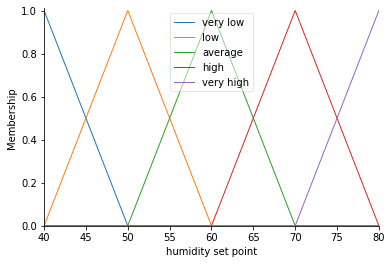

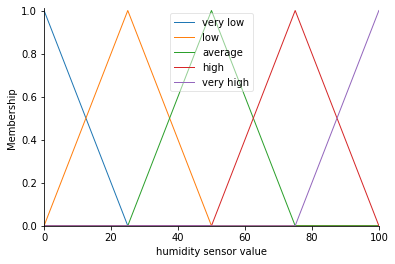

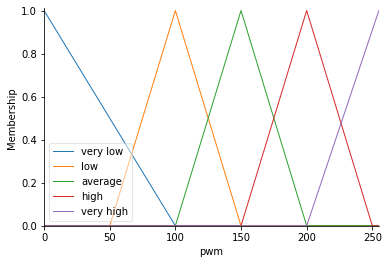

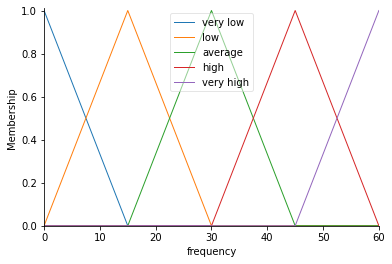

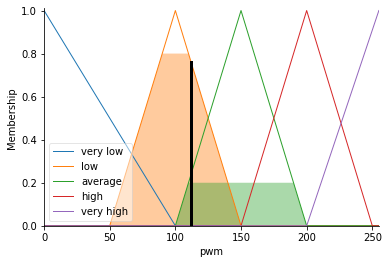

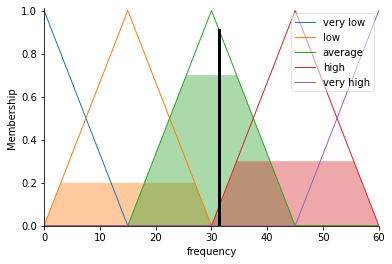

In [ ]:
# Điều khiển động cơ DC / AC
# Độ ẩm
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

humi_setpoint = ctrl.Antecedent(np.arange(40, 81, 1), 'humidity set point')
humi_val_sensor = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity sensor value')
pwm = ctrl.Consequent(np.arange(0, 256, 1), 'pwm')
freq = ctrl.Consequent(np.arange(0, 61, 1), 'frequency')

humi_setpoint['very low'] = fuzz.trimf(humi_setpoint.universe, [40, 40, 50])
humi_setpoint['low'] = fuzz.trimf(humi_setpoint.universe, [40, 50, 60])
humi_setpoint['average'] = fuzz.trimf(humi_setpoint.universe, [50, 60, 70])
humi_setpoint['high'] = fuzz.trimf(humi_setpoint.universe, [60, 70, 80])
humi_setpoint['very high'] = fuzz.trimf(humi_setpoint.universe, [70, 80, 80])

humi_val_sensor['very low'] = fuzz.trimf(humi_val_sensor.universe, [0, 0, 25])
humi_val_sensor['low'] = fuzz.trimf(humi_val_sensor.universe, [0, 25, 50])
humi_val_sensor['average'] = fuzz.trimf(humi_val_sensor.universe, [25, 50, 75])
humi_val_sensor['high'] = fuzz.trimf(humi_val_sensor.universe, [50, 75, 100])
humi_val_sensor['very high'] = fuzz.trimf(humi_val_sensor.universe, [75, 100, 100])

pwm['very low'] = fuzz.trimf(pwm.universe, [0, 0, 100])
pwm['low'] = fuzz.trimf(pwm.universe, [50, 100, 150])
pwm['average'] = fuzz.trimf(pwm.universe, [100, 150, 200])
pwm['high'] = fuzz.trimf(pwm.universe, [150, 200, 250])
pwm['very high'] = fuzz.trimf(pwm.universe, [200, 255, 255])

freq['very low'] = fuzz.trimf(freq.universe, [0, 0, 15])
freq['low'] = fuzz.trimf(freq.universe, [0, 15, 30])
freq['average'] = fuzz.trimf(freq.universe, [15, 30, 45])
freq['high'] = fuzz.trimf(freq.universe, [30, 45, 60])
freq['very high'] = fuzz.trimf(freq.universe, [45, 60, 60])

humi_setpoint.view()
humi_val_sensor.view()
pwm.view()
freq.view()

rule1 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['very low'], pwm['very low'])
rule2 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['low'], pwm['low'])
rule3 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['average'], pwm['average'])
rule4 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['high'], pwm['high'])
rule5 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['very high'], pwm['very high'])
rule6 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['very low'], pwm['very low'])
rule7 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['low'], pwm['very low'])
rule8 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['average'], pwm['low'])
rule9 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['high'], pwm['average'])
rule10 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['very high'], pwm['high'])
rule11 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['very low'], pwm['very low'])
rule12 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['low'], pwm['very low'])
rule13 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['average'], pwm['low'])
rule14 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['high'], pwm['average'])
rule15 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['very high'], pwm['high'])
rule16 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['very low'], pwm['very low'])
rule17 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['low'], pwm['very low'])
rule18 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['average'], pwm['low'])
rule19 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['high'], pwm['average'])
rule20 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['very high'], pwm['average'])
rule21 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['very low'], pwm['very low'])
rule22 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['low'], pwm['very low'])
rule23 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['average'], pwm['low'])
rule24 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['high'], pwm['average'])
rule25 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['very high'], pwm['very high'])

rule26 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['very low'], freq['very low'])
rule27 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['low'], freq['low'])
rule28 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['average'], freq['average'])
rule29 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['high'], freq['high'])
rule30 = ctrl.Rule(humi_setpoint['very low'] & humi_val_sensor['very high'], freq['very high'])
rule31 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['very low'], freq['very low'])
rule32 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['low'], freq['very low'])
rule33 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['average'], freq['low'])
rule34 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['high'], freq['average'])
rule35 = ctrl.Rule(humi_setpoint['low'] & humi_val_sensor['very high'], freq['high'])
rule36 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['very low'], freq['very low'])
rule37 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['low'], freq['very low'])
rule38 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['average'], freq['low'])
rule39 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['high'], freq['average'])
rule40 = ctrl.Rule(humi_setpoint['average'] & humi_val_sensor['very high'], freq['high'])
rule41 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['very low'], freq['very low'])
rule42 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['low'], freq['very low'])
rule43 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['average'], freq['low'])
rule44 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['high'], freq['average'])
rule45 = ctrl.Rule(humi_setpoint['high'] & humi_val_sensor['very high'], freq['average'])
rule46 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['very low'], freq['very low'])
rule47 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['low'], freq['very low'])
rule48 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['average'], freq['low'])
rule49 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['high'], freq['average'])
rule50 = ctrl.Rule(humi_setpoint['very high'] & humi_val_sensor['very high'], freq['very high'])

pwm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                 rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                 rule20, rule21, rule22, rule23, rule24, rule25])
freq_ctrl = ctrl.ControlSystem([rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35,
                                 rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44,
                                 rule45, rule46, rule47, rule48, rule49, rule50])
pwm_control = ctrl.ControlSystemSimulation(pwm_ctrl)
freq_control = ctrl.ControlSystemSimulation(freq_ctrl)

pwm_control.input['humidity set point'] = 69
pwm_control.input['humidity sensor value'] = 55
pwm_control.compute()
print(pwm_control.output['pwm'])
pwm.view(sim = pwm_control)

freq_control.input['humidity set point'] = 47
freq_control.input['humidity sensor value'] = 70
freq_control.compute()
print(freq_control.output['frequency'])
freq.view(sim = freq_control)

79.30379746835429
21.198037466547717


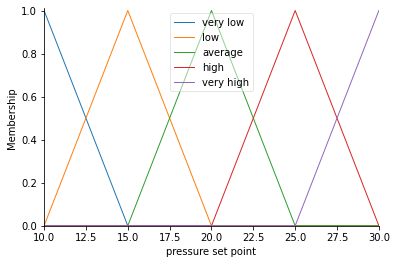

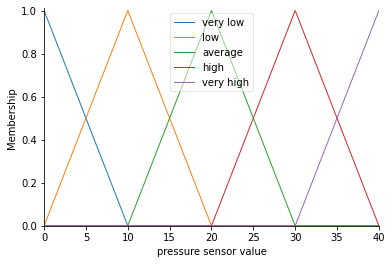

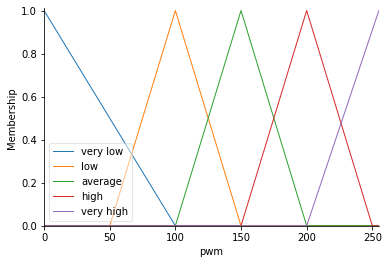

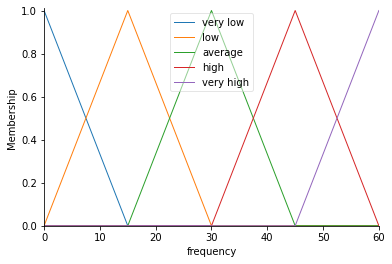

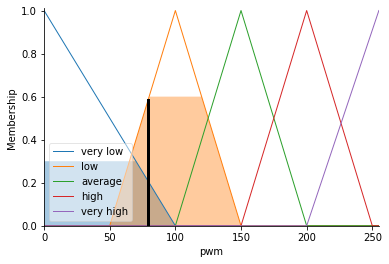

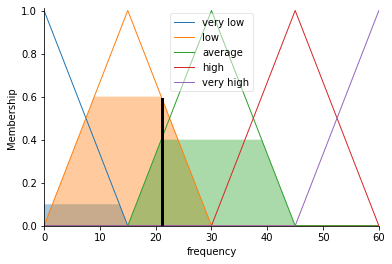

In [ ]:
# Điều khiển dộng cơ DC/AC
# Áp suất (máy bơm)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

pressure_setpoint = ctrl.Antecedent(np.arange(10, 31, 1), 'pressure set point')
pressure_val_sensor = ctrl.Antecedent(np.arange(0, 41, 1), 'pressure sensor value')
pwm = ctrl.Consequent(np.arange(0, 256, 1), 'pwm')
freq = ctrl.Consequent(np.arange(0, 61, 1), 'frequency')

pressure_setpoint['very low'] = fuzz.trimf(pressure_setpoint.universe, [10, 10, 15])
pressure_setpoint['low'] = fuzz.trimf(pressure_setpoint.universe, [10, 15, 20])
pressure_setpoint['average'] = fuzz.trimf(pressure_setpoint.universe, [15, 20, 25])
pressure_setpoint['high'] = fuzz.trimf(pressure_setpoint.universe, [20, 25, 30])
pressure_setpoint['very high'] = fuzz.trimf(pressure_setpoint.universe, [25, 30, 30])

pressure_val_sensor['very low'] = fuzz.trimf(pressure_val_sensor.universe, [0, 0, 10])
pressure_val_sensor['low'] = fuzz.trimf(pressure_val_sensor.universe, [0, 10, 20])
pressure_val_sensor['average'] = fuzz.trimf(pressure_val_sensor.universe, [10, 20, 30])
pressure_val_sensor['high'] = fuzz.trimf(pressure_val_sensor.universe, [20, 30, 40])
pressure_val_sensor['very high'] = fuzz.trimf(pressure_val_sensor.universe, [30, 40, 40])

pwm['very low'] = fuzz.trimf(pwm.universe, [0, 0, 100])
pwm['low'] = fuzz.trimf(pwm.universe, [50, 100, 150])
pwm['average'] = fuzz.trimf(pwm.universe, [100, 150, 200])
pwm['high'] = fuzz.trimf(pwm.universe, [150, 200, 250])
pwm['very high'] = fuzz.trimf(pwm.universe, [200, 255, 255])

freq['very low'] = fuzz.trimf(freq.universe, [0, 0, 15])
freq['low'] = fuzz.trimf(freq.universe, [0, 15, 30])
freq['average'] = fuzz.trimf(freq.universe, [15, 30, 45])
freq['high'] = fuzz.trimf(freq.universe, [30, 45, 60])
freq['very high'] = fuzz.trimf(freq.universe, [45, 60, 60])

pressure_setpoint.view()
pressure_val_sensor.view()
pwm.view()
freq.view()

rule1 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['very low'], pwm['very low'])
rule2 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['low'], pwm['low'])
rule3 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['average'], pwm['average'])
rule4 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['high'], pwm['high'])
rule5 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['very high'], pwm['very high'])
rule6 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['very low'], pwm['very low'])
rule7 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['low'], pwm['very low'])
rule8 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['average'], pwm['low'])
rule9 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['high'], pwm['average'])
rule10 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['very high'], pwm['high'])
rule11 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['very low'], pwm['very low'])
rule12 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['low'], pwm['very low'])
rule13 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['average'], pwm['low'])
rule14 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['high'], pwm['average'])
rule15 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['very high'], pwm['high'])
rule16 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['very low'], pwm['very low'])
rule17 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['low'], pwm['very low'])
rule18 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['average'], pwm['low'])
rule19 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['high'], pwm['average'])
rule20 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['very high'], pwm['average'])
rule21 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['very low'], pwm['very low'])
rule22 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['low'], pwm['very low'])
rule23 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['average'], pwm['low'])
rule24 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['high'], pwm['average'])
rule25 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['very high'], pwm['very high'])

rule26 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['very low'], freq['very low'])
rule27 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['low'], freq['low'])
rule28 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['average'], freq['average'])
rule29 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['high'], freq['high'])
rule30 = ctrl.Rule(pressure_setpoint['very low'] & pressure_val_sensor['very high'], freq['very high'])
rule31 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['very low'], freq['very low'])
rule32 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['low'], freq['very low'])
rule33 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['average'], freq['low'])
rule34 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['high'], freq['average'])
rule35 = ctrl.Rule(pressure_setpoint['low'] & pressure_val_sensor['very high'], freq['high'])
rule36 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['very low'], freq['very low'])
rule37 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['low'], freq['very low'])
rule38 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['average'], freq['low'])
rule39 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['high'], freq['average'])
rule40 = ctrl.Rule(pressure_setpoint['average'] & pressure_val_sensor['very high'], freq['high'])
rule41 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['very low'], freq['very low'])
rule42 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['low'], freq['very low'])
rule43 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['average'], freq['low'])
rule44 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['high'], freq['average'])
rule45 = ctrl.Rule(pressure_setpoint['high'] & pressure_val_sensor['very high'], freq['average'])
rule46 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['very low'], freq['very low'])
rule47 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['low'], freq['very low'])
rule48 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['average'], freq['low'])
rule49 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['high'], freq['average'])
rule50 = ctrl.Rule(pressure_setpoint['very high'] & pressure_val_sensor['very high'], freq['very high'])

pwm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                 rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                 rule20, rule21, rule22, rule23, rule24, rule25])
freq_ctrl = ctrl.ControlSystem([rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35,
                                 rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44,
                                 rule45, rule46, rule47, rule48, rule49, rule50])
pwm_control = ctrl.ControlSystemSimulation(pwm_ctrl)
freq_control = ctrl.ControlSystemSimulation(freq_ctrl)

pwm_control.input['pressure set point'] = 28
pwm_control.input['pressure sensor value'] = 17
pwm_control.compute()
print(pwm_control.output['pwm'])
pwm.view(sim = pwm_control)

freq_control.input['pressure set point'] = 13
freq_control.input['pressure sensor value'] = 19
freq_control.compute()
print(freq_control.output['frequency'])
freq.view(sim = freq_control)

120.96774193548391
25.961538461538474


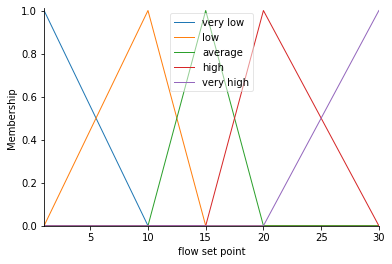

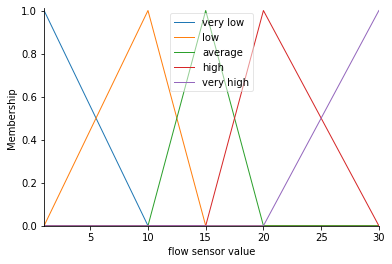

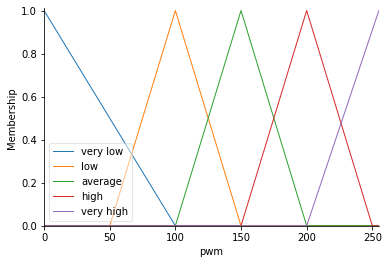

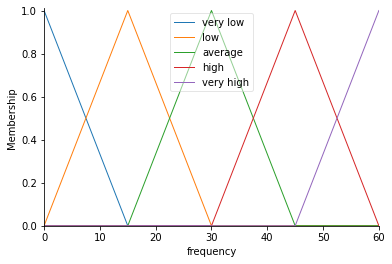

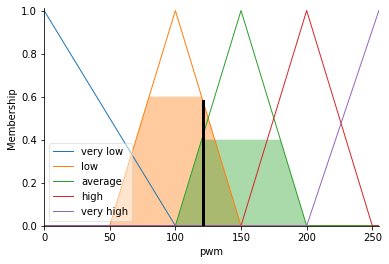

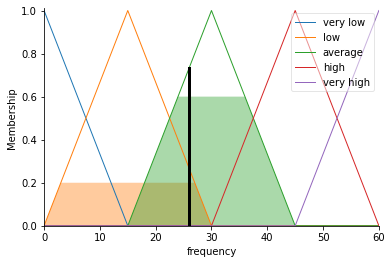

In [ ]:
# Điều khiển dộng cơ DC/AC
# Lưu lượng
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

flow_setpoint = ctrl.Antecedent(np.arange(1, 31, 1), 'flow set point')
flow_val_sensor = ctrl.Antecedent(np.arange(1, 31, 1), 'flow sensor value')
pwm = ctrl.Consequent(np.arange(0, 256, 1), 'pwm')
freq = ctrl.Consequent(np.arange(0, 61, 1), 'frequency')

flow_setpoint['very low'] = fuzz.trimf(flow_setpoint.universe, [1, 1, 10])
flow_setpoint['low'] = fuzz.trimf(flow_setpoint.universe, [1, 10, 15])
flow_setpoint['average'] = fuzz.trimf(flow_setpoint.universe, [10, 15, 20])
flow_setpoint['high'] = fuzz.trimf(flow_setpoint.universe, [15, 20, 30])
flow_setpoint['very high'] = fuzz.trimf(flow_setpoint.universe, [20, 30, 30])

flow_val_sensor['very low'] = fuzz.trimf(flow_val_sensor.universe, [1, 1, 10])
flow_val_sensor['low'] = fuzz.trimf(flow_val_sensor.universe, [1, 10, 15])
flow_val_sensor['average'] = fuzz.trimf(flow_val_sensor.universe, [10, 15, 20])
flow_val_sensor['high'] = fuzz.trimf(flow_val_sensor.universe, [15, 20, 30])
flow_val_sensor['very high'] = fuzz.trimf(flow_val_sensor.universe, [20, 30, 30])

pwm['very low'] = fuzz.trimf(pwm.universe, [0, 0, 100])
pwm['low'] = fuzz.trimf(pwm.universe, [50, 100, 150])
pwm['average'] = fuzz.trimf(pwm.universe, [100, 150, 200])
pwm['high'] = fuzz.trimf(pwm.universe, [150, 200, 250])
pwm['very high'] = fuzz.trimf(pwm.universe, [200, 255, 255])

freq['very low'] = fuzz.trimf(freq.universe, [0, 0, 15])
freq['low'] = fuzz.trimf(freq.universe, [0, 15, 30])
freq['average'] = fuzz.trimf(freq.universe, [15, 30, 45])
freq['high'] = fuzz.trimf(freq.universe, [30, 45, 60])
freq['very high'] = fuzz.trimf(freq.universe, [45, 60, 60])

flow_setpoint.view()
flow_val_sensor.view()
pwm.view()
freq.view()

rule1 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['very low'], pwm['very low'])
rule2 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['low'], pwm['low'])
rule3 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['average'], pwm['average'])
rule4 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['high'], pwm['high'])
rule5 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['very high'], pwm['very high'])
rule6 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['very low'], pwm['very low'])
rule7 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['low'], pwm['very low'])
rule8 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['average'], pwm['low'])
rule9 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['high'], pwm['average'])
rule10 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['very high'], pwm['high'])
rule11 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['very low'], pwm['very low'])
rule12 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['low'], pwm['very low'])
rule13 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['average'], pwm['low'])
rule14 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['high'], pwm['average'])
rule15 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['very high'], pwm['high'])
rule16 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['very low'], pwm['very low'])
rule17 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['low'], pwm['very low'])
rule18 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['average'], pwm['low'])
rule19 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['high'], pwm['average'])
rule20 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['very high'], pwm['average'])
rule21 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['very low'], pwm['very low'])
rule22 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['low'], pwm['very low'])
rule23 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['average'], pwm['low'])
rule24 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['high'], pwm['average'])
rule25 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['very high'], pwm['very high'])

rule26 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['very low'], freq['very low'])
rule27 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['low'], freq['low'])
rule28 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['average'], freq['average'])
rule29 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['high'], freq['high'])
rule30 = ctrl.Rule(flow_setpoint['very low'] & flow_val_sensor['very high'], freq['very high'])
rule31 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['very low'], freq['very low'])
rule32 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['low'], freq['very low'])
rule33 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['average'], freq['low'])
rule34 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['high'], freq['average'])
rule35 = ctrl.Rule(flow_setpoint['low'] & flow_val_sensor['very high'], freq['high'])
rule36 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['very low'], freq['very low'])
rule37 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['low'], freq['very low'])
rule38 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['average'], freq['low'])
rule39 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['high'], freq['average'])
rule40 = ctrl.Rule(flow_setpoint['average'] & flow_val_sensor['very high'], freq['high'])
rule41 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['very low'], freq['very low'])
rule42 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['low'], freq['very low'])
rule43 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['average'], freq['low'])
rule44 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['high'], freq['average'])
rule45 = ctrl.Rule(flow_setpoint['high'] & flow_val_sensor['very high'], freq['average'])
rule46 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['very low'], freq['very low'])
rule47 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['low'], freq['very low'])
rule48 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['average'], freq['low'])
rule49 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['high'], freq['average'])
rule50 = ctrl.Rule(flow_setpoint['very high'] & flow_val_sensor['very high'], freq['very high'])

pwm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                 rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                 rule20, rule21, rule22, rule23, rule24, rule25])
freq_ctrl = ctrl.ControlSystem([rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35,
                                 rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44,
                                 rule45, rule46, rule47, rule48, rule49, rule50])
pwm_control = ctrl.ControlSystemSimulation(pwm_ctrl)
freq_control = ctrl.ControlSystemSimulation(freq_ctrl)

pwm_control.input['flow set point'] = 20
pwm_control.input['flow sensor value'] = 17
pwm_control.compute()
print(pwm_control.output['pwm'])
pwm.view(sim = pwm_control)

freq_control.input['flow set point'] = 13
freq_control.input['flow sensor value'] = 19
freq_control.compute()
print(freq_control.output['frequency'])
freq.view(sim = freq_control)

99.99999999999989
34.098039215686306


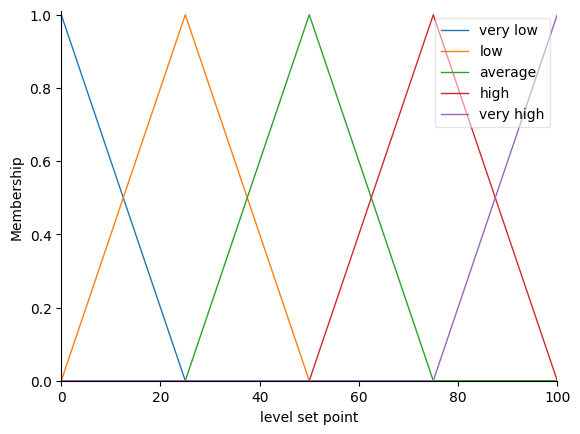

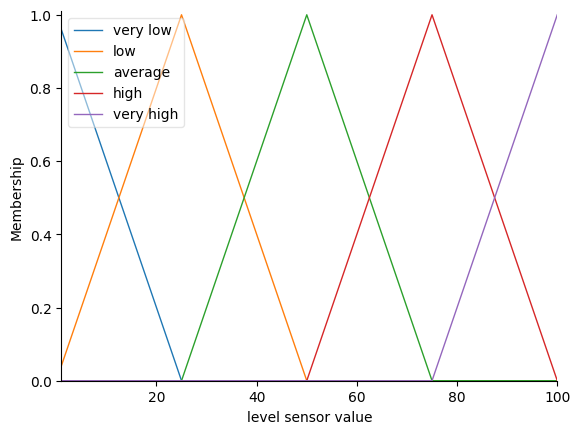

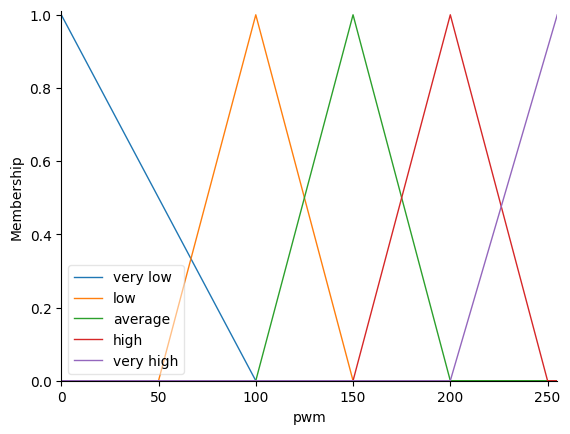

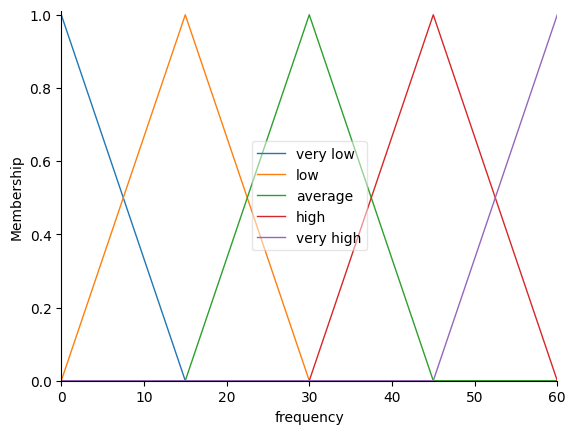

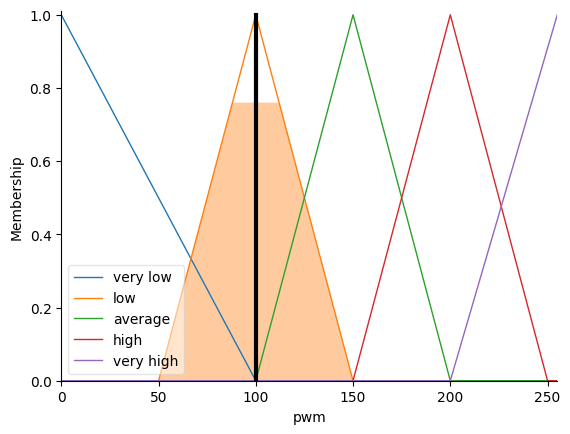

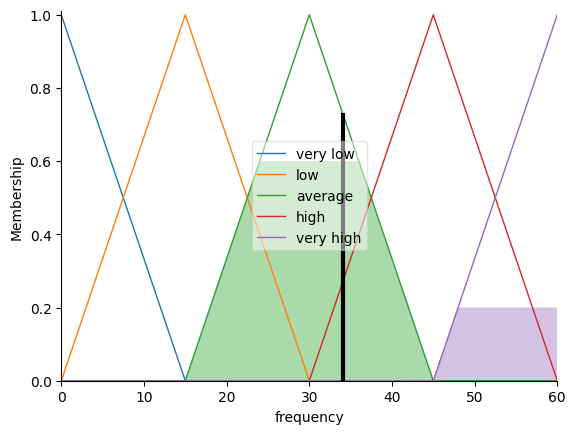

In [3]:
# Điều khiển dộng cơ DC/AC
# Mức nước
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

level_setpoint = ctrl.Antecedent(np.arange(0, 101, 1), 'level set point')
level_val_sensor = ctrl.Antecedent(np.arange(1, 101, 1), 'level sensor value')
pwm = ctrl.Consequent(np.arange(0, 256, 1), 'pwm')
freq = ctrl.Consequent(np.arange(0, 61, 1), 'frequency')

level_setpoint['very low'] = fuzz.trimf(level_setpoint.universe, [0, 0, 25])
level_setpoint['low'] = fuzz.trimf(level_setpoint.universe, [0, 25, 50])
level_setpoint['average'] = fuzz.trimf(level_setpoint.universe, [25, 50, 75])
level_setpoint['high'] = fuzz.trimf(level_setpoint.universe, [50, 75, 100])
level_setpoint['very high'] = fuzz.trimf(level_setpoint.universe, [75, 100, 100])

level_val_sensor['very low'] = fuzz.trimf(level_val_sensor.universe, [0, 0, 25])
level_val_sensor['low'] = fuzz.trimf(level_val_sensor.universe, [0, 25, 50])
level_val_sensor['average'] = fuzz.trimf(level_val_sensor.universe, [25, 50, 75])
level_val_sensor['high'] = fuzz.trimf(level_val_sensor.universe, [50, 75, 100])
level_val_sensor['very high'] = fuzz.trimf(level_val_sensor.universe, [75, 100, 100])

pwm['very low'] = fuzz.trimf(pwm.universe, [0, 0, 100])
pwm['low'] = fuzz.trimf(pwm.universe, [50, 100, 150])
pwm['average'] = fuzz.trimf(pwm.universe, [100, 150, 200])
pwm['high'] = fuzz.trimf(pwm.universe, [150, 200, 250])
pwm['very high'] = fuzz.trimf(pwm.universe, [200, 255, 255])

freq['very low'] = fuzz.trimf(freq.universe, [0, 0, 15])
freq['low'] = fuzz.trimf(freq.universe, [0, 15, 30])
freq['average'] = fuzz.trimf(freq.universe, [15, 30, 45])
freq['high'] = fuzz.trimf(freq.universe, [30, 45, 60])
freq['very high'] = fuzz.trimf(freq.universe, [45, 60, 60])

level_setpoint.view()
level_val_sensor.view()
pwm.view()
freq.view()

rule1 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['very low'], pwm['very low'])
rule2 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['low'], pwm['low'])
rule3 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['average'], pwm['average'])
rule4 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['high'], pwm['high'])
rule5 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['very high'], pwm['very high'])
rule6 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['very low'], pwm['very low'])
rule7 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['low'], pwm['very low'])
rule8 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['average'], pwm['low'])
rule9 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['high'], pwm['average'])
rule10 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['very high'], pwm['high'])
rule11 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['very low'], pwm['very low'])
rule12 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['low'], pwm['very low'])
rule13 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['average'], pwm['low'])
rule14 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['high'], pwm['average'])
rule15 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['very high'], pwm['high'])
rule16 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['very low'], pwm['very low'])
rule17 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['low'], pwm['very low'])
rule18 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['average'], pwm['low'])
rule19 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['high'], pwm['average'])
rule20 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['very high'], pwm['average'])
rule21 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['very low'], pwm['very low'])
rule22 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['low'], pwm['very low'])
rule23 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['average'], pwm['low'])
rule24 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['high'], pwm['average'])
rule25 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['very high'], pwm['very high'])

rule26 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['very low'], freq['very low'])
rule27 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['low'], freq['low'])
rule28 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['average'], freq['average'])
rule29 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['high'], freq['high'])
rule30 = ctrl.Rule(level_setpoint['very low'] & level_val_sensor['very high'], freq['very high'])
rule31 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['very low'], freq['very low'])
rule32 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['low'], freq['very low'])
rule33 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['average'], freq['low'])
rule34 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['high'], freq['average'])
rule35 = ctrl.Rule(level_setpoint['low'] & level_val_sensor['very high'], freq['high'])
rule36 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['very low'], freq['very low'])
rule37 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['low'], freq['very low'])
rule38 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['average'], freq['low'])
rule39 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['high'], freq['average'])
rule40 = ctrl.Rule(level_setpoint['average'] & level_val_sensor['very high'], freq['high'])
rule41 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['very low'], freq['very low'])
rule42 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['low'], freq['very low'])
rule43 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['average'], freq['low'])
rule44 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['high'], freq['average'])
rule45 = ctrl.Rule(level_setpoint['high'] & level_val_sensor['very high'], freq['average'])
rule46 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['very low'], freq['very low'])
rule47 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['low'], freq['very low'])
rule48 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['average'], freq['low'])
rule49 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['high'], freq['average'])
rule50 = ctrl.Rule(level_setpoint['very high'] & level_val_sensor['very high'], freq['very high'])

pwm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                 rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                 rule20, rule21, rule22, rule23, rule24, rule25])
freq_ctrl = ctrl.ControlSystem([rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35,
                                 rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44,
                                 rule45, rule46, rule47, rule48, rule49, rule50])
pwm_control = ctrl.ControlSystemSimulation(pwm_ctrl)
freq_control = ctrl.ControlSystemSimulation(freq_ctrl)

pwm_control.input['level set point'] = 69
pwm_control.input['level sensor value'] = 50
pwm_control.compute()
print(pwm_control.output['pwm'])
pwm.view(sim = pwm_control)

freq_control.input['level set point'] = 80
freq_control.input['level sensor value'] = 90
freq_control.compute()
print(freq_control.output['frequency'])
freq.view(sim = freq_control)